In [1]:
from utils import *
from gridworld import Gridworld
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from POISSONRL_grid import PoissonRL
import toleranceinterval as ti

## Plotting the environment

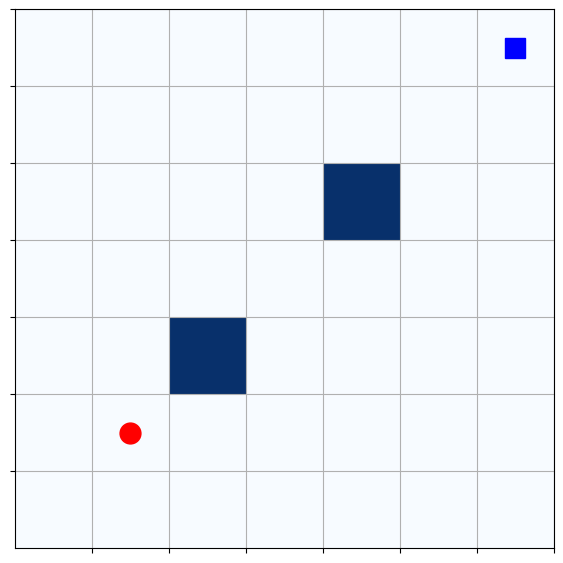

In [2]:
size = 7
env = Gridworld(size=size, continuing=True,stochastic=True)
obs = env.reset(initial_location=[1,1])
env.render_plot()

## Making tolerance intervals for the stochastic environment

Stochastic environment (two icy grids)

100%|██████████| 30/30 [08:57<00:00, 17.92s/it]


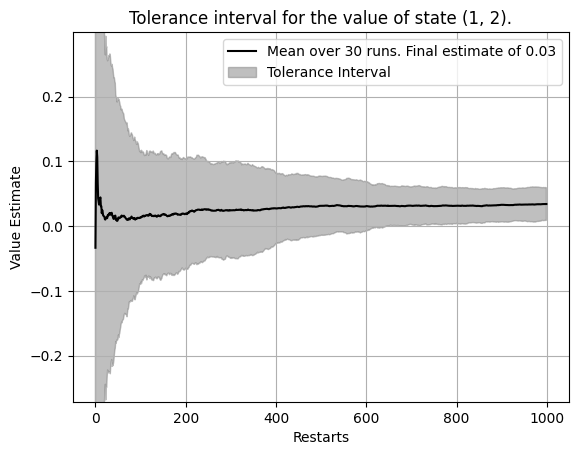

In [4]:
env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True, stochastic=True)

algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))

algo.plot_tolerance_interval(eval_state=(1,2), max_restarts=1000, num_runs=30)

100%|██████████| 30/30 [11:50<00:00, 23.70s/it]


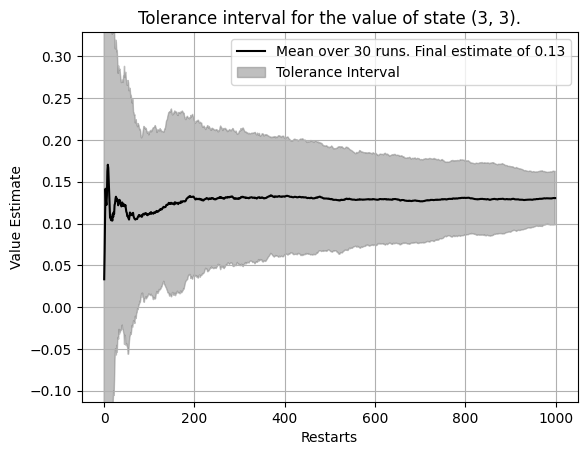

100%|██████████| 30/30 [08:47<00:00, 17.58s/it]


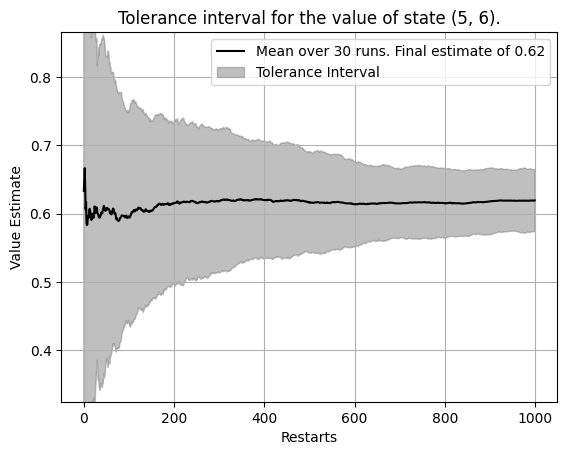

100%|██████████| 30/30 [00:00<00:00, 283.71it/s]
/Users/pieterjanmotmans/Documents/Research Internship/Programming/MCMC-For_RL/GRIDWORLD_EXPERIMENT/GRIDWORLD_EXPERIMENT/POISSONRL_grid.py:456: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([lower_bounds_ti[20], upper_bounds_ti[20]])


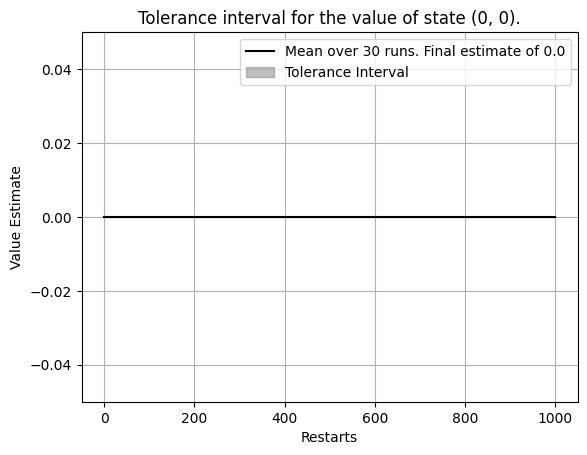

100%|██████████| 30/30 [13:50<00:00, 27.68s/it]


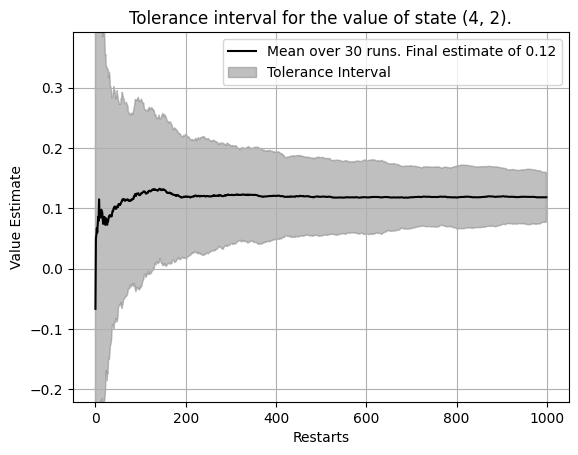

In [6]:
env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True, stochastic=True)

algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))
for eval_state in [(3,3), (5,6), (0,0), (4,2)]:
    algo.plot_tolerance_interval(eval_state=eval_state, max_restarts=1000, num_runs=30)

## Running value function estimation

Initialization of agent Y to state (0,0).

In [3]:
env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True, stochastic=True)

algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))

Gy = algo.value_estimation(plot_convergence=False,epsilon = 0.0,max_restarts=1000,coupling="independent", initial_state_Y=(0,0))

For initial state (0, 0), we find 0.0
For initial state (0, 1), we find -0.0029999999999999957
For initial state (0, 2), we find -0.005999999999999987
For initial state (0, 3), we find 0.05000000000000001
For initial state (0, 4), we find 0.07599999999999986
For initial state (0, 5), we find 0.0629999999999999
For initial state (0, 6), we find 0.11399999999999987
For initial state (1, 0), we find 0.005000000000000007
For initial state (1, 1), we find 0.024
For initial state (1, 2), we find 0.05599999999999998
For initial state (1, 3), we find 0.05300000000000003
For initial state (1, 4), we find 0.07100000000000001
For initial state (1, 5), we find 0.11500000000000009
For initial state (1, 6), we find 0.14500000000000013
For initial state (2, 0), we find 0.049999999999999954
For initial state (2, 1), we find 0.05200000000000006
For initial state (2, 2), we find 0.063
For initial state (2, 3), we find 0.10799999999999998
For initial state (2, 4), we find 0.10900000000000003
For initial 

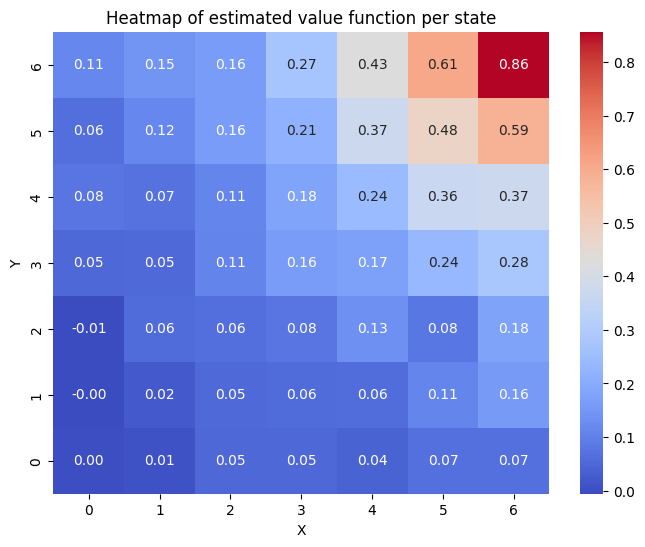

In [4]:
import seaborn as sns

#Gy = algo.Gy

# Reshape the DataFrame into a grid-like structure
# Calculate the dimensions of the grid
max_x = max(index[0] for index in Gy.index)
max_y = max(index[1] for index in Gy.index)
grid_size = (max_x + 1, max_y + 1)

# Convert index tuples to a MultiIndex
Gy.index = pd.MultiIndex.from_tuples(Gy.index, names=['X', 'Y'])

# Reshape the DataFrame into a grid-like structure
grid = Gy['Bias'].unstack(fill_value=0)
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(grid.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('X')
plt.ylabel('Y')
ax.invert_yaxis()
plt.title('Heatmap of estimated value function per state')
plt.show()

Random initialization of agent Y. 

For initial state (0, 0), we find -0.1649999999999999
For initial state (0, 1), we find -0.1420000000000002
For initial state (0, 2), we find -0.13299999999999995
For initial state (0, 3), we find -0.134
For initial state (0, 4), we find -0.11000000000000007
For initial state (0, 5), we find -0.06799999999999987
For initial state (0, 6), we find -0.07499999999999997
For initial state (1, 0), we find -0.13599999999999982
For initial state (1, 1), we find -0.1390000000000001
For initial state (1, 2), we find -0.14699999999999994
For initial state (1, 3), we find -0.11200000000000002
For initial state (1, 4), we find -0.09400000000000004
For initial state (1, 5), we find -0.0799999999999999
For initial state (1, 6), we find -0.060000000000000046
For initial state (2, 0), we find -0.13900000000000018
For initial state (2, 1), we find -0.09500000000000014
For initial state (2, 2), we find -0.12800000000000022
For initial state (2, 3), we find -0.05900000000000002
For initial state (2, 4), w

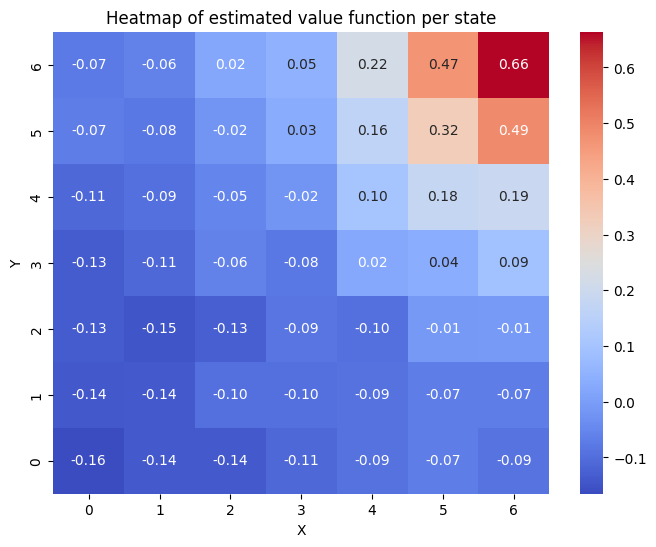

In [6]:
env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True, stochastic=True)

algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))

#algo.render_plot_both()
Gy = algo.value_estimation(plot_convergence=False,epsilon = 0.0,max_restarts=1000,coupling="independent", initial_state_Y="random")

import seaborn as sns

#Gy = algo.Gy

# Reshape the DataFrame into a grid-like structure
# Calculate the dimensions of the grid
max_x = max(index[0] for index in Gy.index)
max_y = max(index[1] for index in Gy.index)
grid_size = (max_x + 1, max_y + 1)

# Convert index tuples to a MultiIndex
Gy.index = pd.MultiIndex.from_tuples(Gy.index, names=['X', 'Y'])

# Reshape the DataFrame into a grid-like structure
grid = Gy['Bias'].unstack(fill_value=0)
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(grid.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('X')
plt.ylabel('Y')
ax.invert_yaxis()
plt.title('Heatmap of estimated value per state')
plt.show()

## Gain estimation

Estimating the gain by running one very long chain

In [14]:
env = Gridworld(size=7, continuing = True, stochastic=True)

env.reset(initial_location=(0,0))

total_reward = 0

for _ in tqdm(range(1_000_000)):
    a = np.random.choice(env.A)
    state, reward, terminated, truncated, info = env.step(a)
    total_reward += reward

average_reward_long_run = total_reward/1_000_000
print(f"The average reward when running one long chain is {total_reward/1_000_000}")

100%|██████████| 1000000/1000000 [00:24<00:00, 41528.19it/s]

The average reward when running one long chain is 0.00335


100%|██████████| 30/30 [12:17<00:00, 24.57s/it]


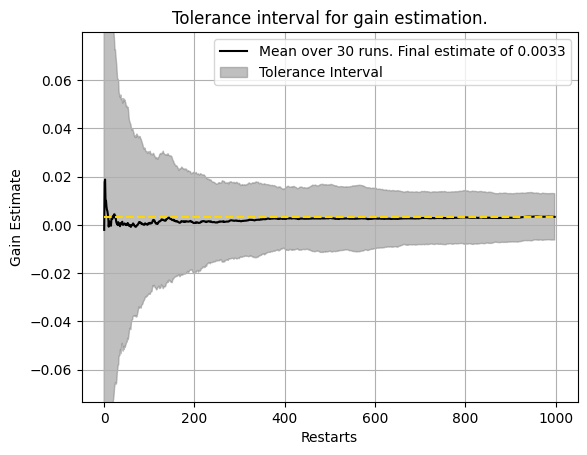

In [19]:
env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True, stochastic=True)

max_restarts=1000
L = 5
k = 5
l = 20
num_runs = 30
algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))
algo.gain_tol_interval(max_restarts = max_restarts, num_runs=num_runs,average_reward_long_run=average_reward_long_run, L=L,k=k,l=l)

## Comparing meeting times between independent and maximal coupling

Running 1000 couplings and keeping track of the meeting times

In [29]:
###########
# Independent coupling
###########

env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True,stochastic=True)

algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))


independent_run_estimates = []

for independent_run in range(1):
    independent_meeting_times = []  
    for i in range(1000):
        _,_, tau = algo.simulate_coupled_lagged_chains(initial_X="random", initial_Y="random",L=5, coupling = "independent")
        independent_meeting_times.append(tau)

In [30]:
############
# Maximal coupling
############

env_X = Gridworld(size=7, continuing = True, stochastic=True)
env_Y = Gridworld(size=7, continuing = True, stochastic=True)

algo = PoissonRL(env_X, env_Y, initial_policy=initialize_policy(env_X.S, env_X.A))


independent_run_estimates = []

for independent_run in range(1):
    maximal_coupling_meeting_times = []  
    for i in range(1000):
        _,_, tau = algo.simulate_coupled_lagged_chains(initial_X="random", initial_Y="random",L=5, coupling = "maximal")
        maximal_coupling_meeting_times.append(tau)
        

Comparison of meeting times

/opt/anaconda3/envs/MCMC/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/MCMC/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/MCMC/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/MCMC/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

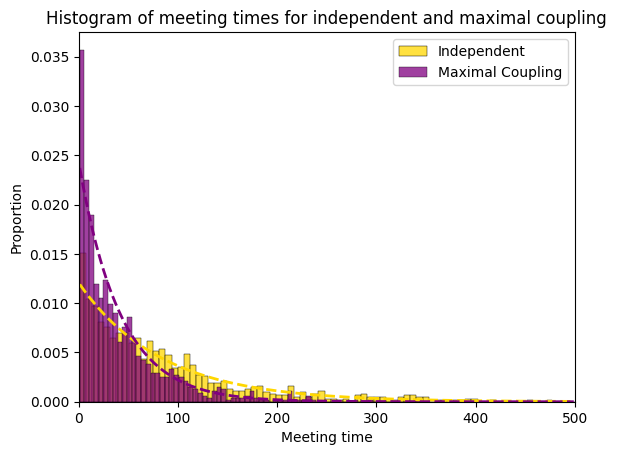

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import geom


# Assuming you have data for independent_meeting_times and maximal_coupling_meeting_times

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the histograms using Seaborn
sns.histplot(independent_meeting_times, bins=100, ax=ax, label='Independent', color='gold', stat = 'density')
sns.histplot(maximal_coupling_meeting_times, bins=100, ax=ax, label='Maximal Coupling', color='purple', stat = 'density')

# Customize the plot
ax.set_xlabel('Meeting time')
ax.set_ylabel('Proportion')
ax.set_title('Histogram of meeting times for independent and maximal coupling')

# Add a legend
ax.legend()


# Generate a geometric random variable
param = 1 / np.mean(independent_meeting_times)
geometric_data = geom.pmf(np.arange(1, 500), p=param)  # Probability density function
# Plot the density line of the geometric distribution
ax.plot(range(1, 500), geometric_data, label='Geometric', color='gold', linewidth = 2, linestyle = '--')


# Generate a geometric random variable
param = 1 / np.mean(maximal_coupling_meeting_times)
geometric_data_max_coupling = geom.pmf(np.arange(1, 500), p=param)  # Probability density function
# Plot the density line of the geometric distribution
ax.plot(range(1, 500), geometric_data_max_coupling, label='Geometric', color='purple', linewidth = 2, linestyle = '--')


ax.set_xlim(0,500)

# Show the plot
plt.show()